<a href="https://colab.research.google.com/github/SecretServicess/Dockerized-Loan-Prediction-System/blob/main/housePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Step 1: Load the dataset into a Pandas DataFrame
import pandas as pd
import seaborn as sns

data = pd.read_csv('/content/HousePricePrediction.xlsx - Sheet1.csv')

In [ ]:
#Drop columns with more than 50% missing values
data.dropna(thresh=len(data)*0.5, axis=1, inplace=True)

In [ ]:
#Fill missing values in numerical columns with mean
num_cols = data.select_dtypes(include=['int', 'float']).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

In [ ]:
#Encode categorical variables using one-hot encoding
cat_cols = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=cat_cols)

In [ ]:
#Scale numerical features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

In [ ]:
#Step 3: Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Step 4: Train multiple regression models using the training set
#You can use techniques such as linear regression, decision tree regression, random forest regression, etc.

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100)
}


In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} trained.')

# Evaluate the performance of each model using various metrics
# You can use techniques such as mean squared error, R-squared, etc.

from sklearn.metrics import mean_squared_error, r2_score

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} MSE: {mse:.2f}, R-squared: {r2:.2f}')

Linear Regression trained.
Decision Tree Regression trained.
Random Forest Regression trained.
Linear Regression MSE: 12888185863757664.00, R-squared: -1873741159200007424.00
Decision Tree Regression MSE: 0.00, R-squared: 0.61
Random Forest Regression MSE: 0.00, R-squared: 0.79


In [ ]:
best_model = RandomForestRegressor(n_estimators=100)
best_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
#Step 7: Visualize the results using different techniques
import matplotlib.pyplot as plt

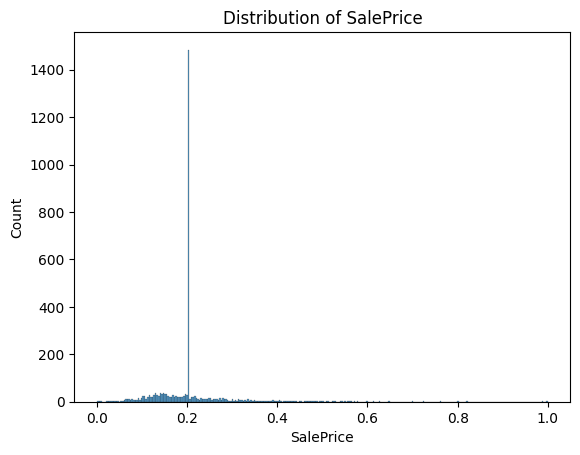

In [ ]:
sns.histplot(data['SalePrice'])
plt.title('Distribution of SalePrice')
plt.show()

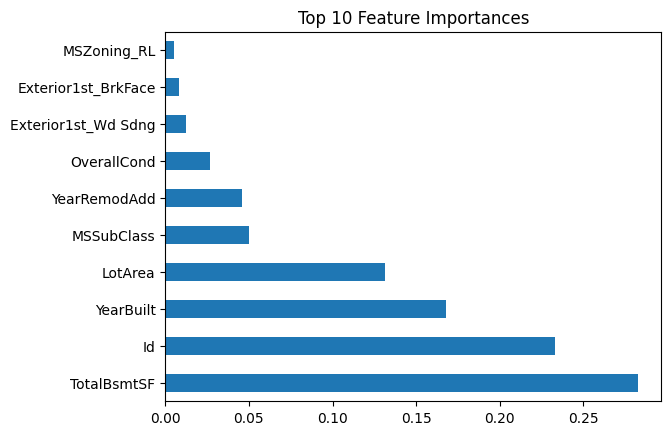

In [ ]:
importances = best_model.feature_importances_
feat_importances = pd.Series(importances, index=X_train.columns)
top_feat_importances = feat_importances.nlargest(10)  # select top 10 features
top_feat_importances.plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()
